<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 1)  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)** 
3. **[ Introduction to Bivariate Analysis](#introduction_to_bivariate_analysis)**
4. **[ Quantitative and Quantitative](#quantitative_vs_quantitative)**
    - 4.1 - [Scatter Plot](#scatter_plot)
    - 4.2 - [Correlation](#Correlation)
    - 4.3 - [Line Plot](#Line_plot)
5. **[Categorical and Quantitative](#categorical_vs_quantitative)**
    - 5.1 - [Bar Plot](#bar_plot)
    - 5.2 - [Violin Plot](#box_plot)
6. **[Categorical and Categorical](#categorical_vs_categorical)**
    - 6.1 - [Grouped Bar Plot](#grouped_bar_plot)
    - 6.2 - [Pivot Table](#pivot_table)
    - 6.3 - [Stacked Bar Plot](#stacked_plot)
    - 6.4 - [Crosstab](#crosstab)

# Big Mart Sales Analysis

It is essential to predict the sales for different outlets of Big Mart so that they can plan the business accordingly. Now we will try to understand the characteristics of products and stores which play an essential role in increasing sales at Big Mart.

## Import the required libraries  

In [1]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

#### Let's read the data which we cleaned in the last session for further analysis.

In [2]:
# load the csv file
# this file is an outcome from day 1 of EDA session
df_sales = pd.read_csv('bigmartsales-cleaned.csv')

# display the head() of the dataset
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


#### Data Definition

The data definition which comes with the data is as follows:

**Item_Identifier:** Unique product ID assigned to every distinct item

**Item_Weight:** Weight of the product

**Item_Fat_Content:** Describes whether the product is low in fat or not

**Item_Visibility:** Total display area allocated to the particular product (in %)

**Item_Type:** Describes the food category to which the item belongs

**Item_MRP:** Maximum Retail Price (list price) of the product

**Outlet_Identifier:** Unique store ID assigned. It consists of an alphanumeric string with length 6

**Outlet_Establishment_Year:** The establishment year of the store

**Outlet_Size:** Size of the store in terms of ground area covered

**Outlet_Location_Type:** Size of the city in which the store is located

**Outlet_Type:** Is the outlet type, either a grocery store or a supermarket

**Profit:** Profit of the item sold (in %)

**Item_Outlet_Sales**: Sales of the product

**Now we need to understand every single variable in the data. Let's start with taking a look at the number of unique values in each variable.**

<a id="uni"> </a>
# 1. Univariate Analysis
The univariate analysis focuses on a single variable in the data. The main purpose of this type of  analysis is to understand each variable in the data using various statistical and visualization techniques. It helps to study the pattern in each variable. The univariate analysis contains various techniques for numerical as well as a categorical variable.

In [3]:
# get the unique values of each variable
df_sales.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   417
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     2098
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            9
Outlet_Type                     4
Item_Outlet_Sales            3493
Profit                        140
dtype: int64

**Interpretation:** The result shows us that there are 1559 products and 10 outlets/stores. We also notice that the `Item_Type` has 16 unique values. We will now explore the frequency of different categorical variables. 

In [4]:
# filter the categorical variables
df_cat = df_sales.select_dtypes(include=object)

# exclude ID column:
df_cat = [x for x in df_cat if x not in ['Item_Identifier','Outlet_Identifier']]

# print frequency of categories
for col in df_cat:
    print (df_sales[col].value_counts(), '\n')

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 



**Interpretation:** Here we get the unique values for all the categorical variables.

#### Now let us consider the variable `Item_Outlet_Sales` for our  analysis.

In [5]:
# since we are analyzing only one variable, we call such type of analysis as Univariate Analysis
Item_Outlet_Sales = df_sales['Item_Outlet_Sales']

#### Let us check the number of observations in the variable using len().

In [6]:
# len() returns the total number of observations
len(Item_Outlet_Sales)

8523

**Interpretation:** The output shows that there are 8523 records in `Item_Outlet_Sales`.

#### We cannot analyze the data properly if some values in the observation are not present. Thus, it is important to check the presence of missing values before analyzing the data. Check if there are missing values in `Item_Outlet_Sales` using isnull().

In [7]:
# isnull() returns 'True' for missing data
# sum() returns the total number of missing values
Item_Outlet_Sales.isnull().sum()

0

**Interpretation:** There are no missing values in the `Item_Outlet_Sales`. We can also take a look at the total missing values for all the variables.

In [8]:
# check the missing values for all the variables
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

#### Since `Item_Outlet_Sales` is a numeric variable, we can use visualization techniques like histogram, boxplot, violinplot to study its distribution.

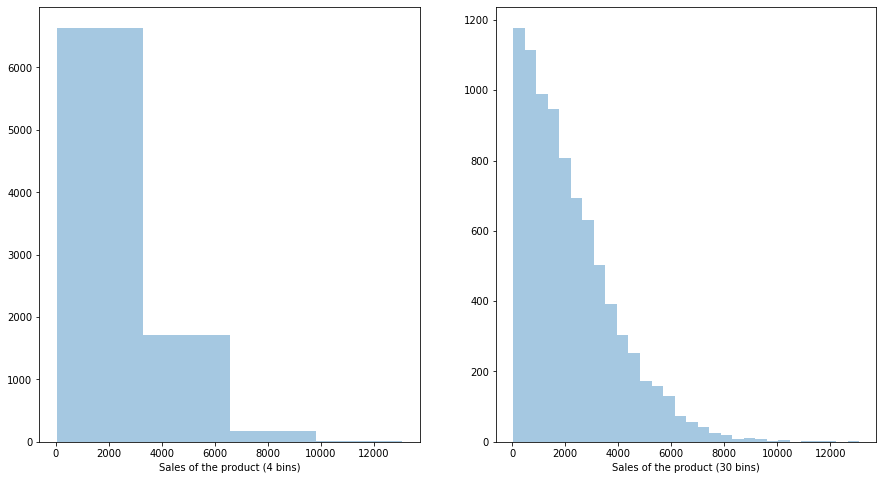

In [9]:
# create two plots in single figure
# we define two axes by passing the value 2 to the subplot function
fig, axes = plt.subplots(1,2, figsize=(15,8))

# create a histogram with 4 bins
# 'axlabel': add the label
# 'kde=False': Whether to plot or not a gaussian kernel density estimator
# ax = axes: axes object to draw plot
# we use axes[0] to use the first axes for plotting
sns.distplot(Item_Outlet_Sales, bins=4, kde=False, ax = axes[0], axlabel='Sales of the product (4 bins)')

# create a histogram with 30 bins
# we use axes[1] to use the second axes for plotting
sns.distplot(Item_Outlet_Sales, bins=30, kde=False, ax = axes[1], axlabel='Sales of the product (30 bins)')

# show the plot
plt.show()

**Interpretation:** We notice from the histogram on the left that the number of bins is too less (bins = 4) that does not allow the underlying pattern of the data to be easily observed. On the other hand, with the histogram on the right, where the number of bins is more, we can observe that the outlet sales are positively skewed.

### Plot the mean, median, and mode on the histogram so we can make a comparison between the statistics

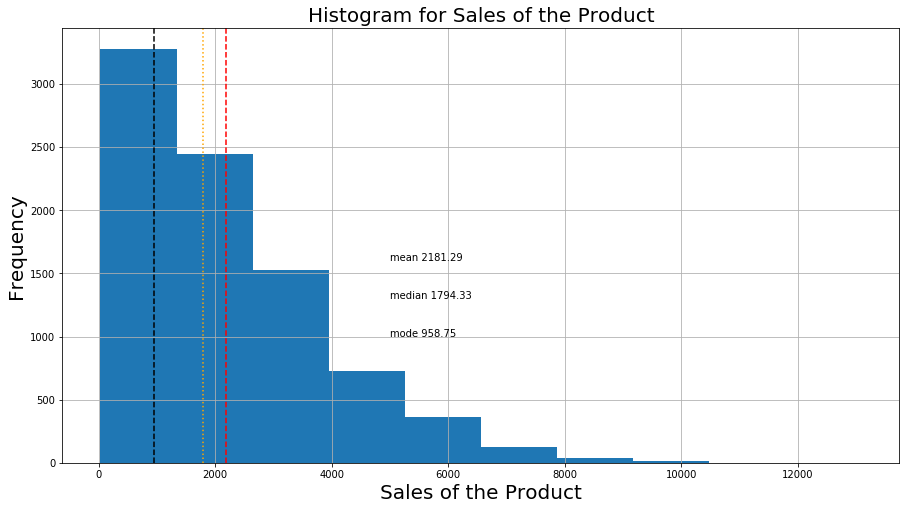

In [10]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot histogram
df_sales['Item_Outlet_Sales'].hist()

# calculate the mean
mean = df_sales['Item_Outlet_Sales'].mean()

# calculate the mode
mode = df_sales['Item_Outlet_Sales'].mode()

# calculate the median
median = df_sales['Item_Outlet_Sales'].median()

# plot the line for mean
plt.axvline(mean, color='red',linestyle='--')

# plot the line for median
plt.axvline(median, color='orange',linestyle='dotted')

# plot the line for mode
# mode returns a series
# we use mode[0] to use the first index for plotting
plt.axvline(mode[0], color='black',linestyle='--')

# add the value of the mean in the plot
plt.text(5000,1600, 'mean'+' '+ str(round(mean,2)))

# add the value of the median in the plot
plt.text(5000,1300, 'median'+' '+ str(round(median,2)))

# add the value of the mode in the plot
plt.text(5000,1000, 'mode'+' '+ str(round(mode[0],2)))

# set label for y-axis
plt.ylabel("Frequency", fontsize=20)

# set label for x-axis
plt.xlabel("Sales of the Product", fontsize=20)

# set title
plt.title("Histogram for Sales of the Product", fontsize=20)

# show plot
plt.show()

**Interpretation:** Here, the red line represents the mean, an orange line represents the median, and the black line represents the mode. It can be observed that the modal value is lowest and the mean is highest among the three measures of central tendency, which tells us that most of the product sales are less than the average sales.

**Now, let us see if there are any extreme values in the variable `Item_Outlet_Sales`.**

**A Boxplot can be used to visualize the presence of outliers in the data. In boxplot, the observation will be an outlier, if it is outside the specific range (1.5 times IQR above the third quartile and below the first quartile)**

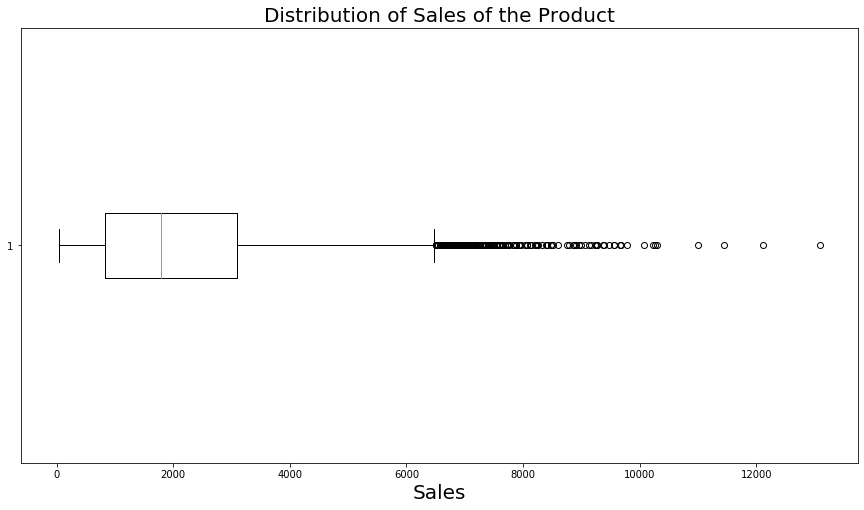

In [11]:
# plot the boxplot to visualize the outliers

# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot the horizontal boxplot using 'vert = False'
# ax: create an axes object in the figure
ax = plt.boxplot(Item_Outlet_Sales, vert = False)

# set the title
plt.title("Distribution of Sales of the Product", fontsize=20)

# set the label for x-axis
plt.xlabel("Sales", fontsize=20)

# display the plot
plt.show()

**Interpretation:** From the above boxplot, we can observe that the outliers are present in the data, most of them exist above the upper whisker. The outliers can affect the performance of various machine learning models. Thus it is necessary to deal with the outliers before building the model.

We will produce a numerical summary of the variable to understand the data a little better.

In [12]:
# find the summary statistics of the sales
Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**Interpretation:** We notice that there is a big difference between the Q3 (3101.2964) and the maximum value (13086.964800)

In [13]:
# 3rd quartile (75%)
upper_quartile = Item_Outlet_Sales.quantile(0.75) 

# 1st quartile (25%)
lower_quartile = Item_Outlet_Sales.quantile(0.25) 

# calculate inter-quartile range
iqr = upper_quartile - lower_quartile

# print the value of iqr
print("Inter quartile range is:",iqr)

# calculate the value of upper wisker
upper_whisker = Item_Outlet_Sales[Item_Outlet_Sales<=upper_quartile+1.5*iqr].max()

# print the value of upper whisker
print("Upper wisker is:",upper_whisker )

# calculate the value of lower whisker 
lower_whisker = Item_Outlet_Sales[Item_Outlet_Sales>=lower_quartile-1.5*iqr].min()

# print the value of lower whisker
print("Lower wisker is:",lower_whisker )

Inter quartile range is: 2267.049
Upper wisker is: 6478.234
Lower wisker is: 33.29


We will plot the above values in the boxplot to understand the sales of the product.

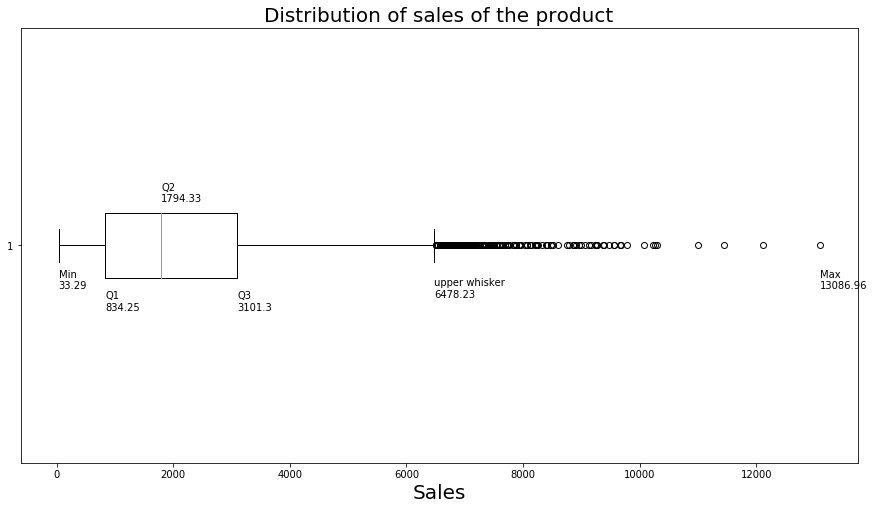

In [14]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# by default 'vert = True' returns a vertical boxplot
# plot the horizontal boxplot using 'vert = False'
plt.boxplot(Item_Outlet_Sales, vert = False)

# plot the third quartile
# x: co-ordinates of the x-axis
# y: co-ordinates of the y-axis
# s: text
plt.text(x=Item_Outlet_Sales.quantile(0.75) , y=0.85, s = "Q3\n"+ str(round(Item_Outlet_Sales.quantile(0.75),2)))

# add the value of median in the plot
plt.text(x=Item_Outlet_Sales.quantile(0.50) , y=1.1, s= "Q2\n"+ str(round(Item_Outlet_Sales.quantile(0.50),2)))

# add the value of first quartile in the plot
plt.text(x=Item_Outlet_Sales.quantile(0.25) , y=0.85, s="Q1\n"+ str(round(Item_Outlet_Sales.quantile(0.25), 2)))

# add minimum value of the variable in the plot 
plt.text(x=Item_Outlet_Sales.min(), y=0.9, s="Min\n"+ str(round(Item_Outlet_Sales.min(), 2)))

# add the maximum value of the variable in the plot
plt.text(x=Item_Outlet_Sales.max(), y=0.9, s="Max\n"+ str(round(Item_Outlet_Sales.max(), 2)))

# add the value of the upper whisker in the plot
plt.text(x=upper_whisker, y=0.88, s='upper whisker\n'+ str(round(upper_whisker, 2)))

# set the title
plt.title("Distribution of sales of the product", fontsize=20)

# set the label for x-axis
plt.xlabel("Sales", fontsize=20)

# display the plot
plt.show()

**Interpretation:** Note that this chart displays sales of the product on the x-axis. The values above the upper whisker are the outliers.

**Violin plot: It is similar to a boxplot which shows the distribution of the quantitative variable.**

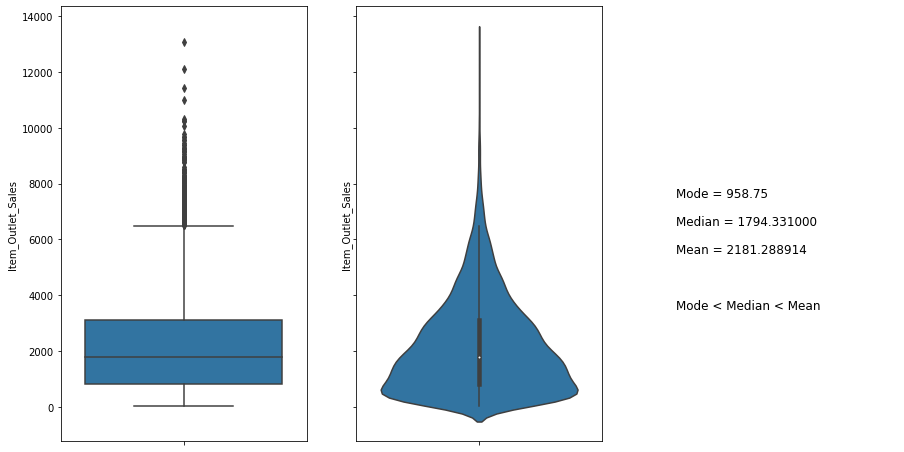

In [15]:
# create two plots in single figure
# we define two axes by passing the value 3 to the subplot function
# sharey returns the y axis label
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))

# create a boxplot
# orient="v": create a vertical plot
# ax = axes: axes object to draw plot
# we use axes[0] to use the first axes for plotting
sns.boxplot(Item_Outlet_Sales, orient="v", ax = axes[0])

# create a violinplot
# orient="v": create a vertical plot
# ax = axes: axes object to draw plot
# we use axes[1] to use the second axes for plotting
sns.violinplot(Item_Outlet_Sales, orient="v", ax = axes[1]);

# add a value of mode in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 7500, "Mode = 958.75", fontsize=12)

# add a value of median in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 6500, "Median = 1794.331000", fontsize=12)

# add a value of mean in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 5500, "Mean = 2181.288914", fontsize=12)

# add the result in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 3500, "Mode < Median < Mean", fontsize=12)

# remove the axis for the third subplot
plt.axis("off")

# show the plot
plt.show()

**Interpretation:** The mean is 2181.29, the median is 1794.33, and the mode is 958.75. Of all the three statistics, the mean is the largest, while the mode is the smallest. The positive skewness of the distribution indicates that most of the product sales are less than the average sales.

**Cumulative Distribution: Cumulative distribution function is used to describe the distribution of a variable. This distribution can be defined for discrete as well as a continuous variable.**

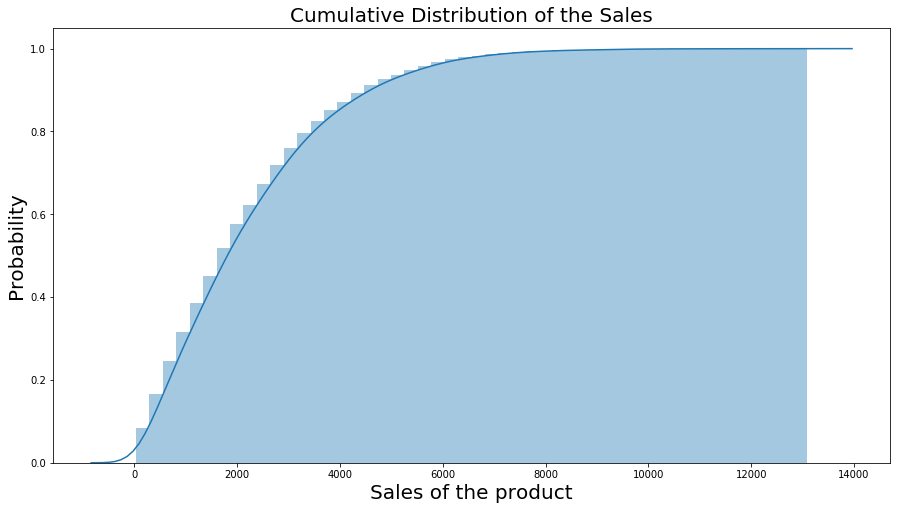

In [16]:
# 'cumulative=True' in 'kde_kws' returns the cumulative kernel density estimator
# 'cumulative=True' in 'hist_kws' returns the cumulative histogram
# ax: create an axes object in the figure
ax = sns.distplot(Item_Outlet_Sales, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

# set the label for y-axis
ax.set_ylabel('Probability', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Sales of the product', fontsize=20)

# set the title
plt.title('Cumulative Distribution of the Sales', fontsize=20)

# display the plot
plt.show()

**Interpretation:** It is frequency distribution of the product sales represented cumulatively. Suppose we want to know what is the probability of sales under 6000. So the plot shows the probability of the sales below 6000 would be in between 80 to 90 percent.

**What other features in the dataset do you think will help to understand the business?<br>
                   The types of the product, price, profit of the product, the location of the store might help since they have such an impact on the sales.**

<a id="multi"> </a>
# 2. Multivariate Analysis

Multivariate analysis is used to study two or more variables in the data. The main purpose is to understand the relationship between the variables using various statistical and visualization techniques. The analysis helps to find the variables which are highly correlated to each other; also, it exhibits the effect of one variable on other variables in the data. </b>


Take a look at the other variables and the first few rows of the dataset for multivariate analysis.

In [17]:
# check the head of the dataset
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


**Is there any relationship amongst the features?**

**Scatter plot: A scatter plot is used to study the relationship between the two variables. It exhibits the correlation between the variables. We can also detect the extreme points using a scatter plot.**

Let us plot scatter plots to visualize the relationship between the price of the product and sales at different outlet types.

In [18]:
# unique values of the outlet types
df_sales['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

Create a scatter plot for different outlet types.

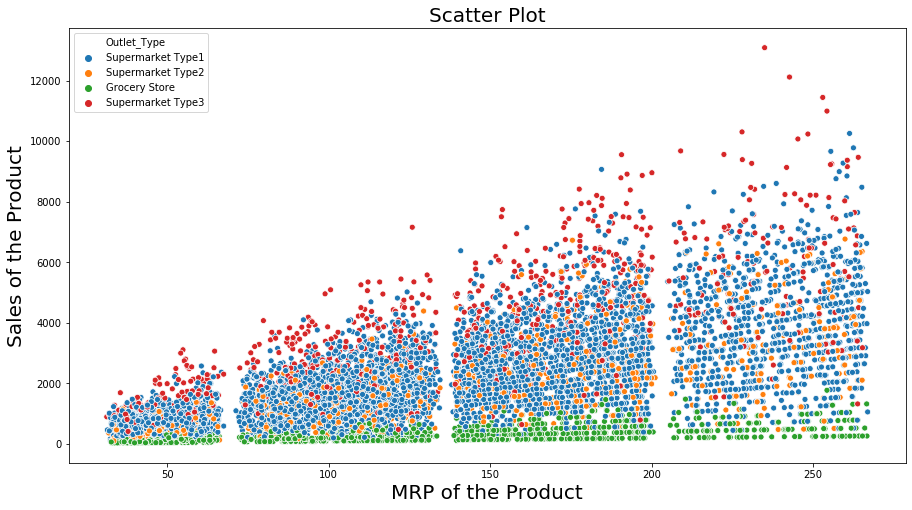

In [19]:
# plot the scatter plot
# use 'hue' to add 3rd variable in the scatter plot
sns.scatterplot('Item_MRP', 'Item_Outlet_Sales', data = df_sales, hue='Outlet_Type')

# set label for x-axis
plt.xlabel("MRP of the Product", fontsize=20)

# set label for y-axis
plt.ylabel("Sales of the Product", fontsize=20)

# set title
plt.title("Scatter Plot", fontsize=20)

# display the plot
plt.show()

**Interpretation:** This plot shows the relationship between the MRP and sales of the product for different types of supermarkets. We can see that there is a positive correlation between the MRP and sales of the product in supermarkets and grocery store.

**You thought that when you increase the price, ordinarily the quantity you can sell goes down, and when you decrease the amount, the volume you can sell goes up. Is that right?<br>
But sometimes, a higher price indicates the quality of the product and thereby increase in sales volumes.**

Now, let us plot the scatter plots for all the numerical variables. <br>

**pairplot() is used to plot a matrix of scatter plots. The diagonal plots display the distribution of each of the variable, and the off-diagonal plots explain the relationship between pairs.**

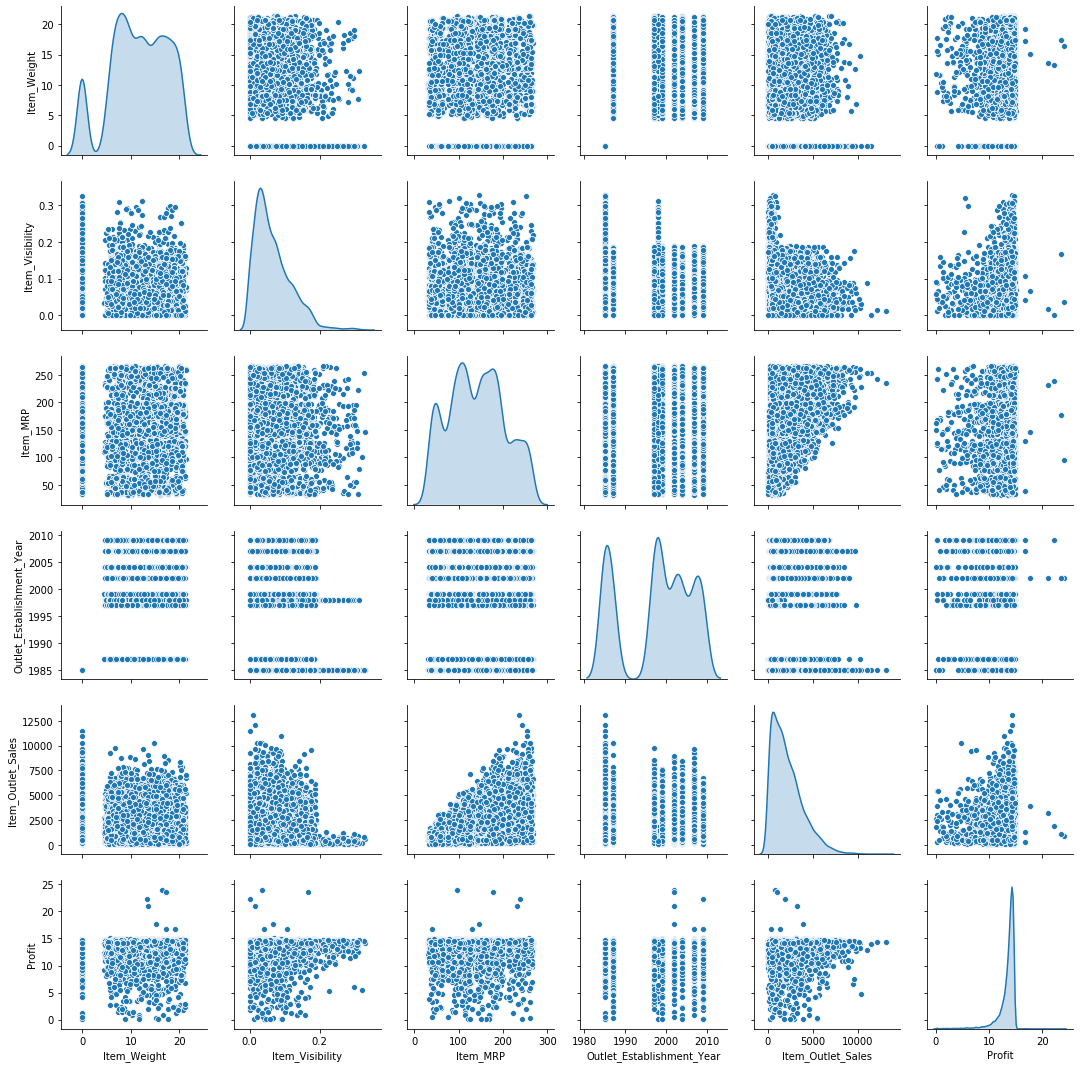

In [20]:
# create a pairplot
# diag_kind = 'kde': plot for the diagonal subplots
sns.pairplot(df_sales, diag_kind = 'kde')

# display the plot
plt.show()

**Interpretation:** With the help of the above pair plot, you get a quick idea about the pairwise relationship between the variables.

**You might be interested to know the following:<br>**

**How are the sales correlated with the price of the product?<br>
Is there any relationship with other variables?**
           

Let's examine the correlated variables of the dataset.

**corr() returns the correlation matrix containing a correlation coefficient between the numeric variables.**<br>

The coefficient of correlation is a numerical technique to find the variables which are correlated to each other. The correlation coefficient always lies between -1 to +1. If the value is near +1, then the corresponding variables are positively correlated and for value near -1, there is a high negative correlation.

In [21]:
# correlation between numeric variables
df_sales.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.055081,0.020616,0.365815,-0.034997,-0.016058
Item_Visibility,-0.055081,1.000000,-0.001597,-0.074834,-0.128625,0.014269
Item_MRP,0.020616,-0.001597,1.000000,0.005046,0.567555,0.004109
Outlet_Establishment_Year,0.365815,-0.074834,0.005046,1.000000,-0.049135,-0.019674
Item_Outlet_Sales,-0.034997,-0.128625,0.567555,-0.049135,1.000000,0.000951
Profit,-0.016058,0.014269,0.004109,-0.019674,0.000951,1.000000


**Interpretation:** We have seen there is a positive correlation between sales and MRP of the product using a scatter plot. The above result shows us there is not a strong positive but a moderate positive (0.567555) relationship between sales and MRP of the product. We can visualize the correlation matrix using a heatmap.

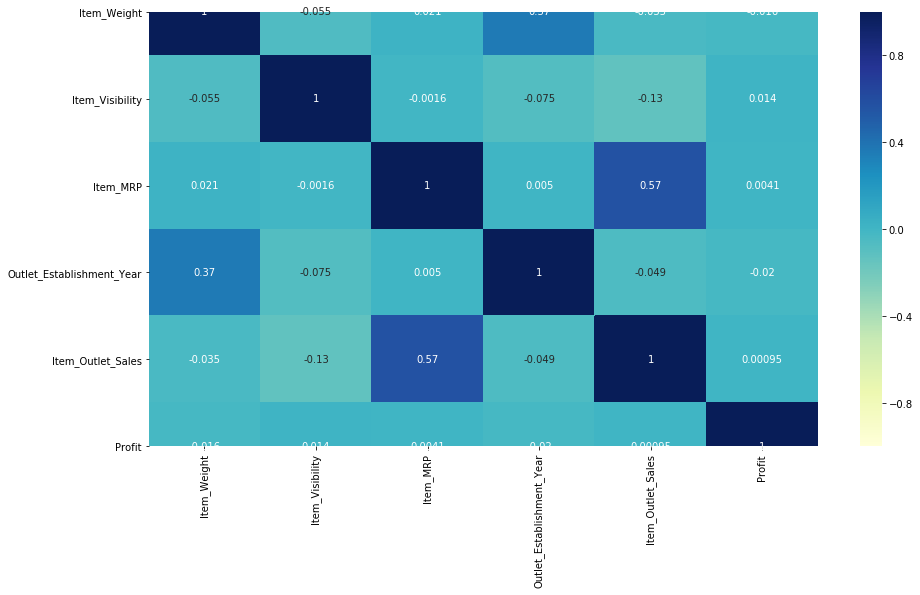

In [22]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# 'annot = True' returns the correlation values
# 'cmap' assigns color to each cell
# vmin, vmax : values to anchor the colormap, otherwise they are inferred from the data 
# we can pass various colors to 'cmap' as 'Blues', 'Greens', 'rainbow', 'prism', 'copper' and so on 
sns.heatmap(df_sales.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

Now, We will see the correlation between the variables for the different types of supermarkets. Create a subsets for different supermarkets. Let's see the relationship for various supermarkets.

In [23]:
#  create a subset of the data that only includes the observations that the have value of “Supermarket Type1”
df_Supermarket_Type1 = df_sales[(df_sales["Outlet_Type"] == "Supermarket Type1")]

#  create a subset of the data that only includes the observations that have the value of “Supermarket Type2”
df_Supermarket_Type2 = df_sales[(df_sales["Outlet_Type"] == "Supermarket Type2")]

#  create a subset of the data that only includes the observations that have the value of “Supermarket Type3”
df_Supermarket_Type3 = df_sales[(df_sales["Outlet_Type"] == "Supermarket Type3")]

#  create a subset of the data that only includes the observations that have the value of “Grocery Store"”
df_Grocery_Store = df_sales[(df_sales["Outlet_Type"] == "Grocery Store")]

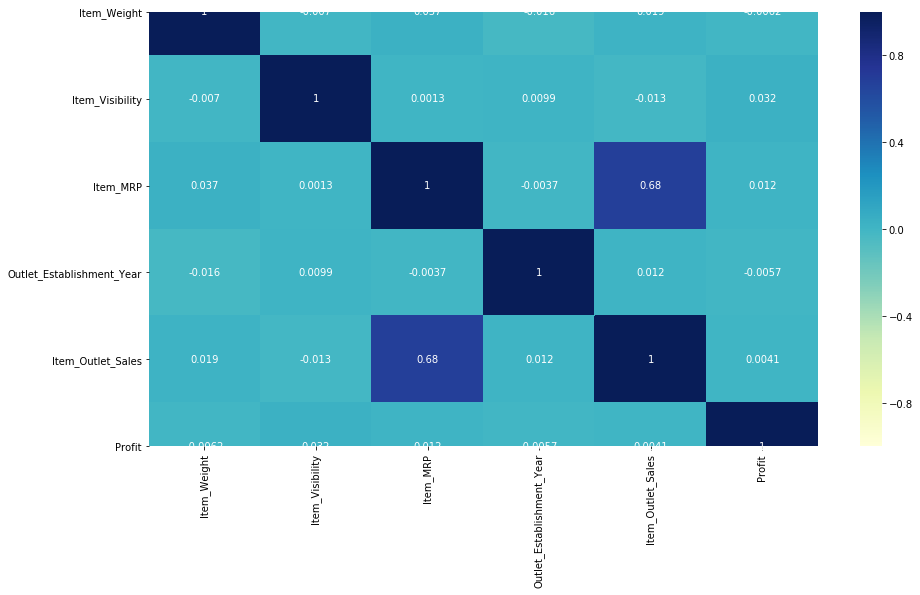

In [24]:
############################################ Supermarket_Type1 ################################################################

# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# 'annot = True' returns the correlation values
# 'cmap' assigns color to each cell
# vmin, vmax : values to anchor the colormap, otherwise they are inferred from the data 
# we can pass various colors to 'cmap' as 'Blues', 'Greens', 'rainbow', 'prism', 'copper' and so on 
sns.heatmap(df_Supermarket_Type1.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

**Interpretation:** We can see the moderate positive correlation between sales and MRP of the product. Otherwise, there is no correlation between the variables for the Supermarket Type1.

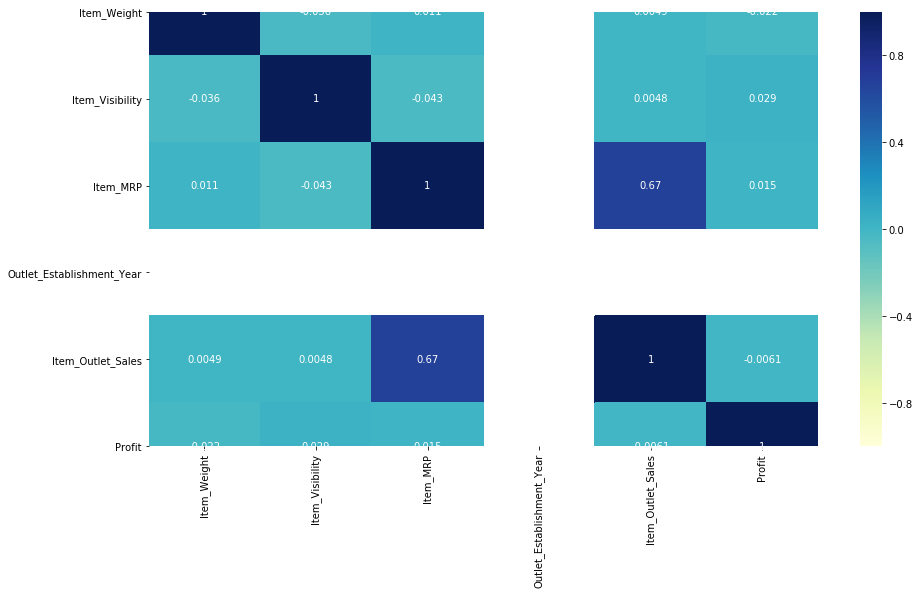

In [25]:
############################################ Supermarket_Type2 ################################################################

# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# 'annot = True' returns the correlation values
# 'cmap' assigns color to each cell
# vmin, vmax : values to anchor the colormap, otherwise they are inferred from the data 
# we can pass various colors to 'cmap' as 'Blues', 'Greens', 'rainbow', 'prism', 'copper' and so on 
sns.heatmap(df_Supermarket_Type2.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

**Interpretation:** The above plot shows the correlation between the variables for Supermarket_Type2. Here, we do not see the relationship for the variable `Outlet_Establishment_Year` because there is no variation in the data. Check the standard deviation for the variable `Outlet_Establishment_Year` to know the variation.

In [26]:
# check the standard deviation of the variable 'Outlet_Establishment_Year' for 'Supermarket_Type2'
df_Supermarket_Type2.Outlet_Establishment_Year.std()

0.0

**The zero standard deviation means there is no variation in the data.**

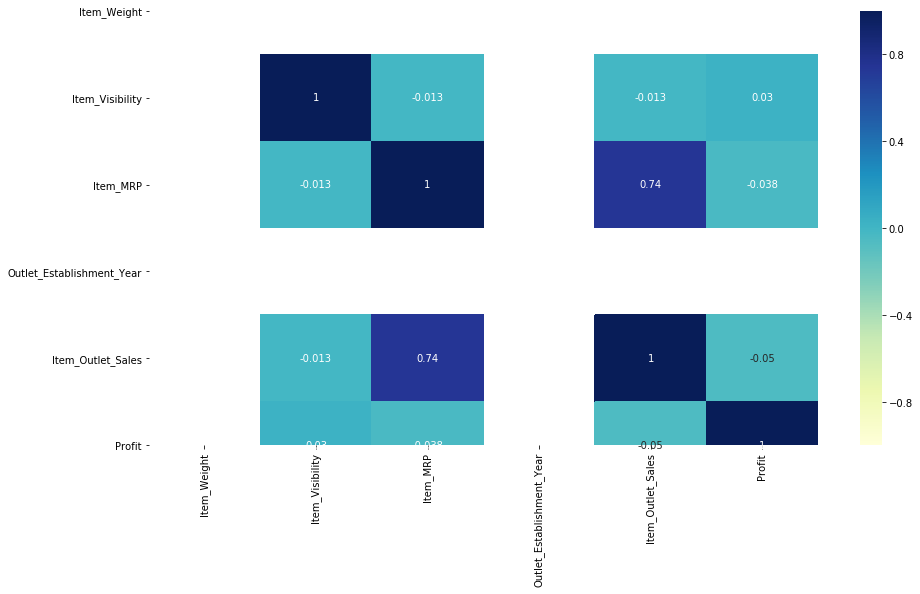

In [27]:
############################################ Supermarket_Type3 ################################################################

# set the figure size
plt.rcParams["figure.figsize"] = [15,8]
# 'annot = True' returns the correlation values
# 'cmap' assigns color to each cell
# vmin, vmax : values to anchor the colormap, otherwise they are inferred from the data 
# we can pass various colors to 'cmap' as 'Blues', 'Greens', 'rainbow', 'prism', 'copper' and so on 
sns.heatmap(df_Supermarket_Type3.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

**Interpretation:** Notice that there is a strong positive correlation between the sales and the MRP of the products for Supermarket Type3.

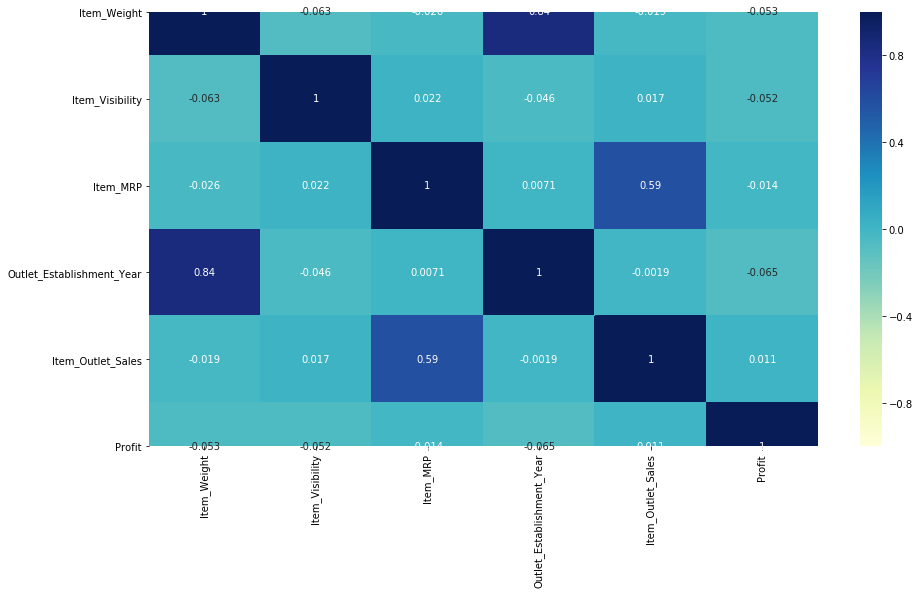

In [28]:
############################################ Grocery_Store ####################################################################

# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# 'annot = True' returns the correlation values
# 'cmap' assigns color to each cell
# vmin, vmax : values to anchor the colormap, otherwise they are inferred from the data 
# we can pass various colors to 'cmap' as 'Blues', 'Greens', 'rainbow', 'prism', 'copper' and so on 
sns.heatmap(df_Grocery_Store.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

This plot shows us the correlation between variables for the `Grocery_Store`. If we observe a relationship between variables of all supermarkets, there might be some impact of MRP on sales of the product for Supermarkets of Type3.

**Now, we will check the distribution of sales of the product across all the categories of the categorical variable. We will use boxplot to compare the distribution of different types in the categorical variable.**

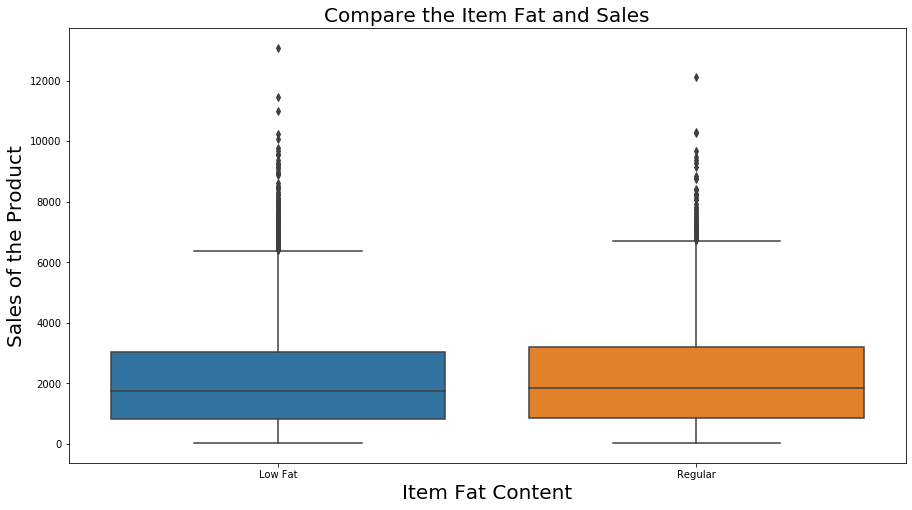

In [29]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# compare sales of the product for different fat content
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df_sales)

# set the title
plt.title("Compare the Item Fat and Sales", fontsize=20)

# set label for x-axis
plt.xlabel("Item Fat Content", fontsize=20)

# set label for y-axis
plt.ylabel("Sales of the Product", fontsize=20)

# display the plot
plt.show()

**Interpretation:** The distribution of sales of the product across the item content is similar. There is not much difference between the average sales across the different fat content.

<a id="introduction_to_bivariate_analysis"> </a>
# 3. Introduction to Bivariate Analysis

Bivariate analysis is the analysis of two variables (attributes).<br>
Now, we will explore the association between each variable of the dataset and the target variable to find the relationship between them.

<a id="types_of_bivariate_analysis"> </a>

## Types of Bivariate Analysis
<html>
<body>

<ul>
Follwing are the types of bivariate analysis:<br>
    
  1. Quantitative and Quantitative<br>
  2. Categorical and Quantitative<br>
  3. Categorical and Categorical<br>  
  
</ul>  
</body>
</html>

<a id="quantitative_vs_quantitative"> </a>
# 4. Quantitative and Quantitative

<html>
<body>

To explore the relationship between two quantitative variables we use:
<ul>
    
  1. Scatter Plot<br>
    
  2. Correlation<br>
  
  3. Line Plot
</ul>  

</body>

**Take a look at quantitative variables to understand data.**

In [53]:
# filter the numeric variables
df_numeric = df_sales.select_dtypes(np.number)

# print the first five rows of the data
df_numeric.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size,Order_Outlet_Size,Freq_Encoded_Item_Type,Scaled_Item_Outlet_Sales,minmax_Item_Outlet_Sales
0,9.30,0.016047,249.8,1999,3735.1380,11.5,1,1.0,8.001877,0.910601,0.283587
1,5.92,0.019278,48.3,2009,443.4228,14.3,1,1.0,5.221166,-1.018440,0.031419
2,17.50,0.016760,141.6,1999,2097.2700,14.5,1,1.0,4.986507,-0.049238,0.158115
3,19.20,0.000000,182.1,1998,732.3800,13.6,3,3.0,14.455004,-0.849103,0.053555
4,8.93,0.000000,53.9,1987,994.7052,14.1,0,2.0,10.676992,-0.695373,0.073651


<a id="scatter_plot"> </a>
## 4.1 Scatter Plot

**Let's start exploring the relationship between two quantitative variables.**

**Consider the question: Does the visibility of product affect it's sales?
<br>
In order to answer the question, we may plot a scatter plot of `Item_visibily` against `Item_Outlet_Sales`.**

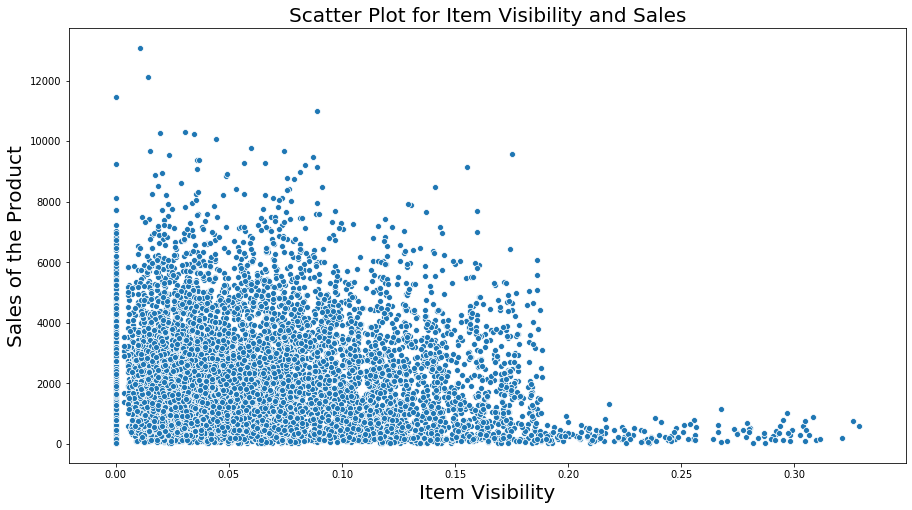

In [54]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot the scatterplot 
# let the scatter plot definition be assigned to variable 'ax' 
ax = sns.scatterplot('Item_Visibility', 'Item_Outlet_Sales', data = df_sales)

# set the label for y-axis
ax.set_ylabel('Sales of the Product', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Item Visibility', fontsize=20)

# set title
plt.title("Scatter Plot for Item Visibility and Sales", fontsize=20)

# display the plot
plt.show()

**Interpreation:** From the above plot, we can conclude that there is a negative correlation between visibility and sales of the products. Therefore, we see that products having low visibility has high sales. Most of the products sold have visibility less than 0.2. Also, note that there are products which have zero visibilty.

<a id="Correlation"> </a>
## 4.2 Correlation

Correlation is a measure which depicts how strongly are the variables in the data related. It's values range from -1 to +1. 

**Let us plot the heatmap of the correlation matrix.**


**Now, we plot the heatmap to study the strength of the relationship between the variables.**

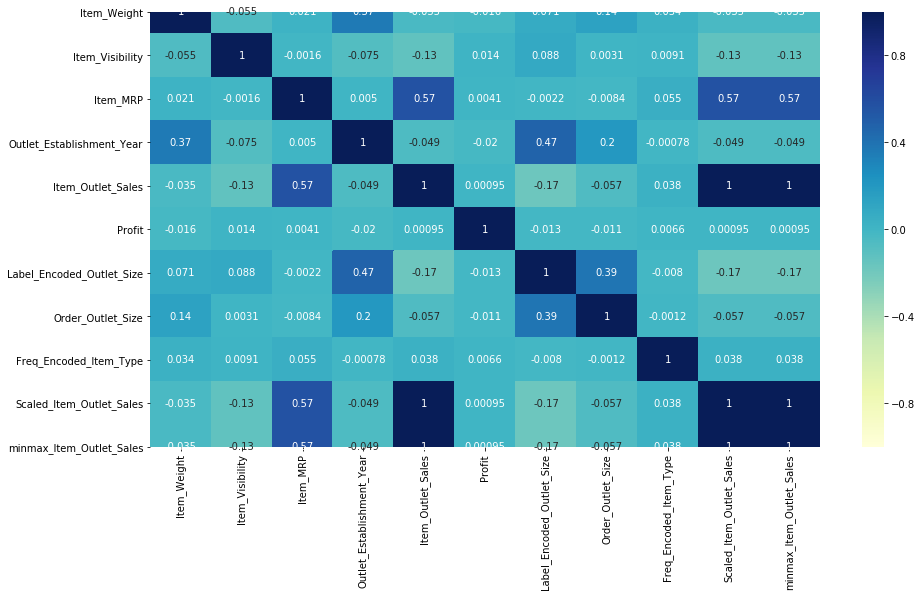

In [55]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# 'annot = True' displays the correlation values on the map
# 'cmap' assigns color to each cell
# vmin, vmax : values to anchor the colormap, otherwise they are inferred from the data 
# we can pass various colors to 'cmap' as 'Blues', 'Greens', 'rainbow', 'prism', 'copper' and so on 
sns.heatmap(df_sales.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

In the last session, we have seen a correlation between sales and MRP of the products for various supermarket types. Here, we can observe that the low negative correlation between product visibility and sales of the product. Therefore, less visible products in the store may have higher sales.

<a id="Line_plot"> </a>
## 4.3 Line Plot

**It is essential to understand the trend of the sales amount. It helps in determining the sales strategy. Create a line plot to see the pattern in the sales.**

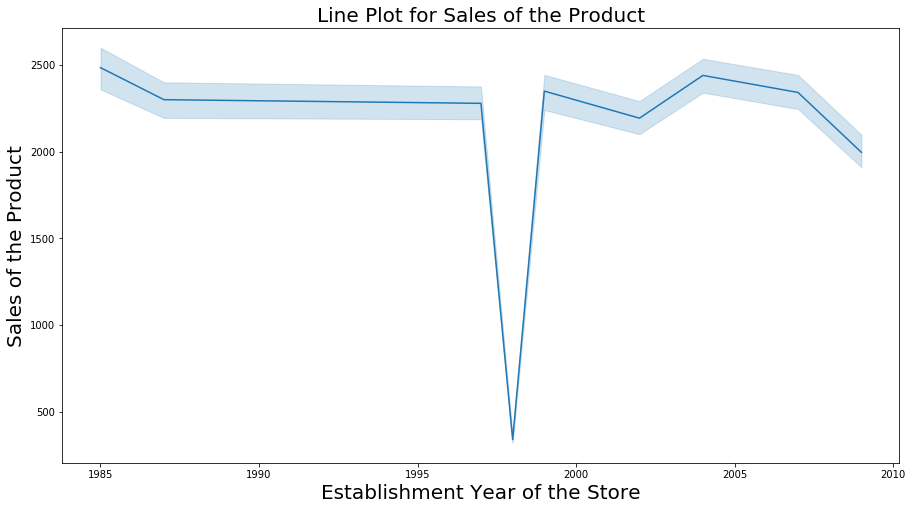

In [56]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# create a line plot 
# let the line plot definition be assigned to variable 'ax'
ax = sns.lineplot(data = df_sales, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')

# set the label for y-axis
ax.set_ylabel('Sales of the Product', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Establishment Year of the Store', fontsize=20)

# set title
plt.title("Line Plot for Sales of the Product", fontsize=20)

# display the plot
plt.show()

**Interpretation:** Here, we can see the sales suddenly decreased between 1995 and 2000.

**Let us now understand the relationship between categorical and quantitative variables.**

<a id="categorical_vs_quantitative"> </a>
# 5. Categorical and Quantitative

<html>
<body>

To explore the relationship between categorical and quantitative variables we use: 


<ul>
    
  1. Bar Plot<br>
    
  2. Grouped Box Plot
  </ul>  

</body>

<a id="bar_plot"> </a>
## 5.1 Bar Plot

**Impact of outlet type on sales of the products.**

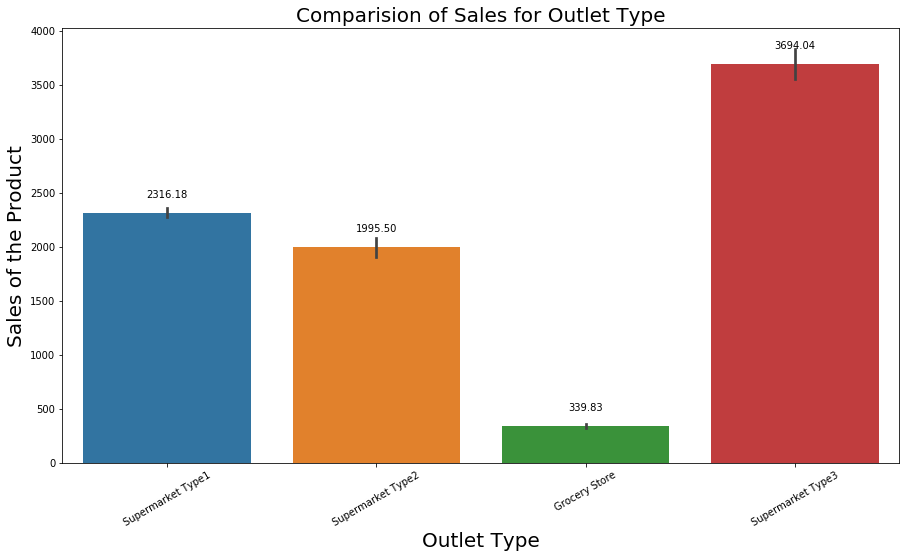

In [57]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot the bar plot
ax = sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales', data=df_sales)

# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# display the values on the bar plot
# annotate(): it is use to emphasize specific observations
# get_height(): return the height of the bar 
# (p.get_x() + p.get_width() / 2., p.get_height()): it is use to place the text on the top
# get_width() and get_x(): return the value of the x-axis
# ha = 'center': used for horizontal alignment
#  xytext(): the text appear at the location given by xytext
# textcoords: specify an offset (in points) from the xy value
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
    
# set the label for y-axis
ax.set_ylabel('Sales of the Product', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Outlet Type', fontsize=20)

# set title
plt.title("Comparision of Sales for Outlet Type", fontsize=20)

# display the plot
plt.show()

**Interpretation:** Recall that sns.barplot() shows us the mean value of each category. The above plot shows the average sales of each outlet category, And we observe that the average sale for the grocery store is very less compared to others.

**Let's create a barplot to see the total sales for each supermarket type.**

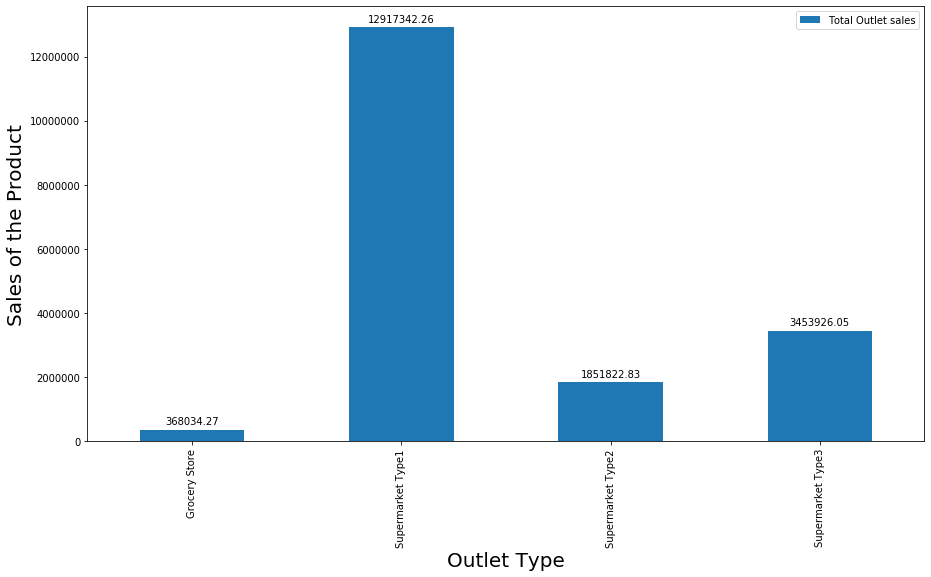

In [58]:
# groupby(): group 'Item_Outlet_Sales' according to each 'Outlet_Type'
# sum(): find total sales amount for each outlet type
# plot(x, y, kind=bar): to plot the barplot
# let the barplot definition be assigned to variable 'ax' 
ax = df_sales.groupby(by=['Outlet_Type'])['Item_Outlet_Sales'].sum().plot(x='Outlet_Type', y='Item_Outlet_Sales',
                                                                                        kind='bar', figsize=(15,8),label='Total Outlet sales')
ax.legend()

# scale the y-axis to avoid expoenential format
plt.ticklabel_format(axis="y", scilimits=(0,15000))

# display the values on the bar plot
# annotate(): it is use to emphasize specific observations
# get_height(): return the height of the bar 
# (p.get_x() + p.get_width() / 2., p.get_height()): it is use to place the text on the top
# get_width() and get_x(): return the value of the x-axis
# ha = 'center': horizontal alignment
#  xytext(): the text appear at the location given by xytext
# textcoords: specify an offset (in points) from the xy value
for p in ax.patches: # Use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0,5), textcoords = 'offset points')
    
# set the label for y-axis
ax.set_ylabel('Sales of the Product', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Outlet Type', fontsize=20)

# display the plot
plt.show()

**Interpretation:** Now, this plot gives us the exact sales amount for different supermarkets. Supermarket_Type1 has the highest sales which is more than 12 million.

### Impact of outlet size on sales of the products.

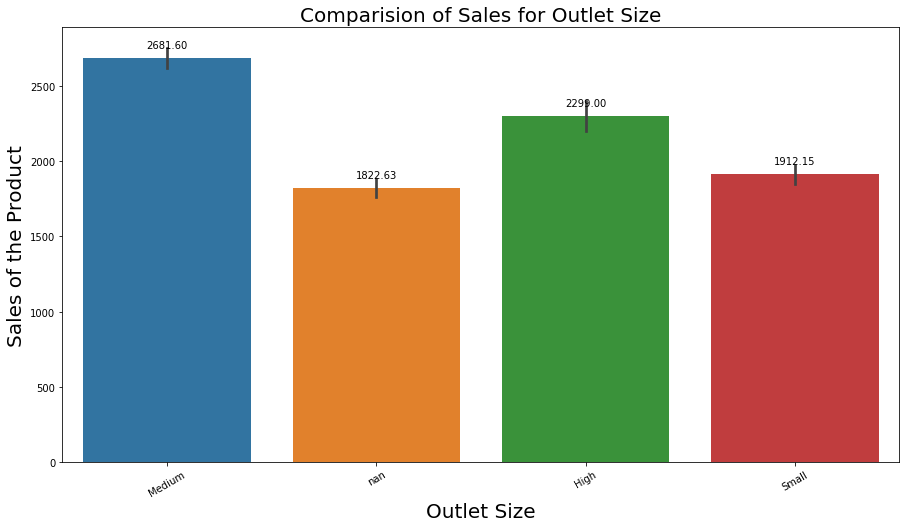

In [59]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot the barplot
# let the barplot definition be assigned to variable 'ax'
ax = sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales', data=df_sales)

# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# display the values on the bar plot
# annotate(): it is use to emphasize specific observations
# get_height(): return the height of the bar 
# (p.get_x() + p.get_width() / 2., p.get_height()): it is use to place the text on the top
# get_width() and get_x(): return the value of the x-axis
# ha = 'center': horizontal alignment
# xytext(): the text appear at the location given by xytext
# textcoords: specify an offset (in points) from the xy value
for p in ax.patches: # Use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
    
# set the label for y-axis
ax.set_ylabel('Sales of the Product', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Outlet Size', fontsize=20)

# set title
plt.title("Comparision of Sales for Outlet Size", fontsize=20)

# display the plot
plt.show()

**Interpretation:** Here, we see the average sales for all the store sizes (High, Medium, and Small). The Medium sized stores have the highest average sales.

**Create a barplot to see the total sales amount for each outlet size.**

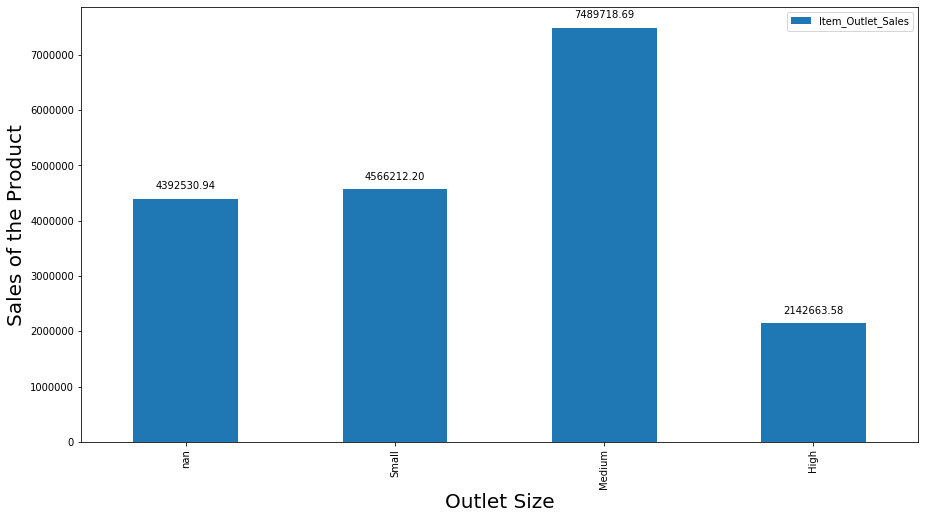

In [60]:
# groupby(): group 'Item_Outlet_Sales' according to each 'Outlet_Size'
# sum(): find total sales amount for each 'Outlet_Type'
# plot(x, y, kind=bar): plot the barplot
ax = df_sales.groupby(by=['Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index().sort_values(['Outlet_Size'],
                    ascending=False).plot(x='Outlet_Size',y='Item_Outlet_Sales',kind='bar', figsize=(15,8))

# display the values on the bar plot
# annotate(): it is use to emphasize specific observations
# get_height(): return the height of the bar 
# (p.get_x() + p.get_width() / 2., p.get_height()): it is use to place the text on the top
# get_width() and get_x(): return the value of the x-axis
# ha = 'center': horizontal alignment
#  xytext(): the text appear at the location given by xytext
# textcoords: specify an offset (in points) from the xy value
for p in ax.patches: # Use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
    
# set the label for y-axis
ax.set_ylabel('Sales of the Product', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Outlet Size', fontsize=20)

# display the plot
plt.show()

**Interpretation:** According to the results, we can say that sales in a medium-sized store are high.

<a id="box_plot"> </a>
## 5.2 Violin Plot

**Profit is an essential factor of business that influences the decision of whether to expand the business or not. Let's compare the profit of various supermarkets.**

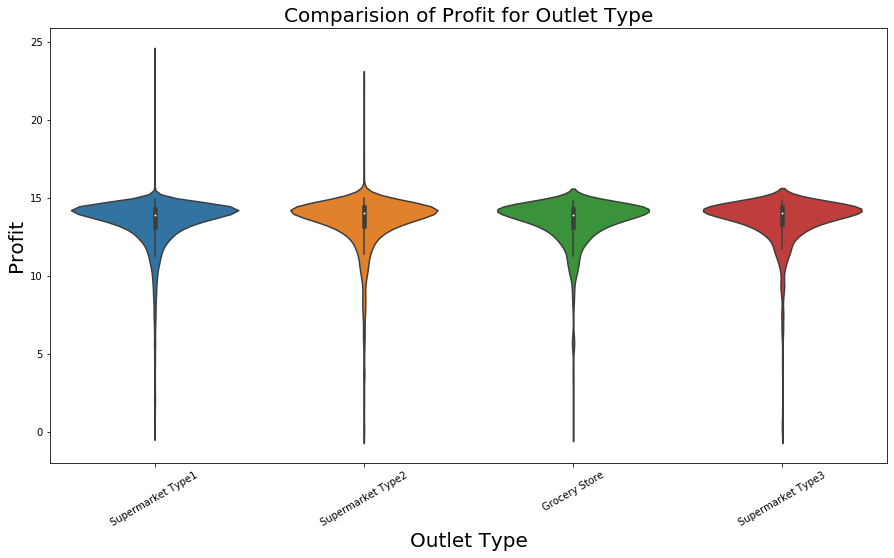

In [61]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot the boxplot
ax = sns.violinplot(x=df_sales['Outlet_Type'], y=df_sales['Profit'])

# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# set the label for y-axis
ax.set_ylabel('Profit', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Outlet Type', fontsize=20)

# set title
plt.title("Comparision of Profit for Outlet Type", fontsize=20)

# display the plot
plt.show()

**Interpretation:** There is not much difference between the average profit for all the supermarkets.

<a id="categorical_vs_categorical"> </a>
# 6. Categorical and Categorical

<html>
<body>

To explore the relationship between categorical and categorical variables we use:


<ul>
    
  1. Grouped Bar Plot<br>
 
  2. Pivot Table<br>
  
  3. Stacked Bar Plot<br>
  
  4. Crosstab
  
</ul>  

</body>

<a id="grouped_bar_plot"> </a>
## 6.1 Grouped Bar Plot

**We can use grouped bar plot to analyze two different categorical variables. Create a barplot to compare the sales of different categories of fat content by outlet size.**

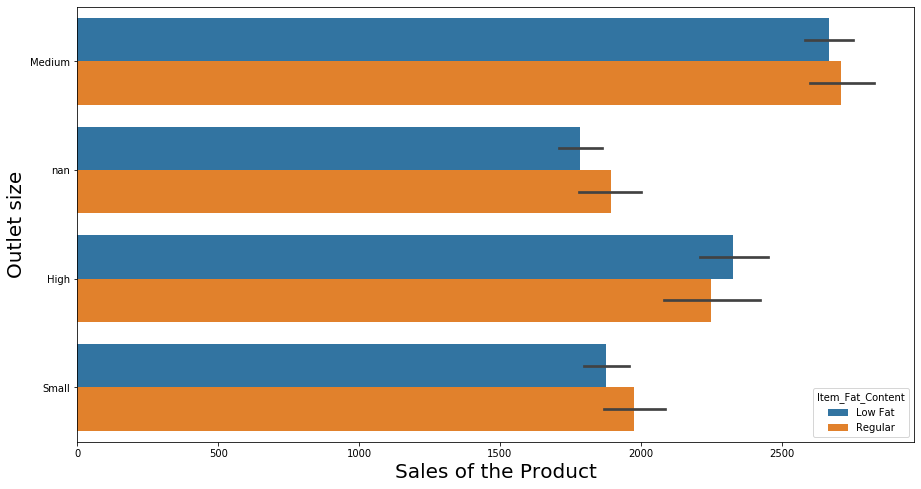

In [62]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# create a barplot using two categorical variables
# use 'hue' to add 3rd variable in the barplot
# let the barplot definition be assigned to  variable 'ax'  
ax = sns.barplot(data=df_sales, x='Item_Outlet_Sales', y='Outlet_Size', hue='Item_Fat_Content')

# set the label for y-axis
ax.set_ylabel('Outlet size', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Sales of the Product', fontsize=20)

# display the plot
plt.show()

**Interpretation:** This plot gives us the average sales of the product compared by the category of fat content and outlet size.We notice that the sales for the low fat products are more incase of high outlet sized stores compared to the regular fat products. 

<a id="pivot_table"> </a>
## 6.2 Pivot Table

**Sometimes management wants to understand the data in more detail. Aggregate the data by grouping the different outlet types with their unique store ID.**

In [63]:
# aggregate the data using pivot table
# aggfunc = np.mean: find the mean
pd.pivot_table(df_sales,index=["Outlet_Identifier","Outlet_Type"], aggfunc = np.mean)

,,Freq_Encoded_Item_Type,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Label_Encoded_Outlet_Size,Order_Outlet_Size,Outlet_Establishment_Year,Profit,Scaled_Item_Outlet_Sales,minmax_Item_Outlet_Sales
Outlet_Identifier,Outlet_Type,,,,,,,,,,,
OUT010,Grocery Store,9.028839,140.736937,339.351662,0.101457,12.913153,3,3.0,1998,13.309910,-1.079429,0.023446
OUT013,Supermarket Type1,9.201157,141.374356,2298.995256,0.059957,13.006148,0,2.0,1987,13.428541,0.068979,0.173568
OUT017,Supermarket Type1,9.141710,139.424406,2340.675263,0.061377,12.826668,3,3.0,2007,13.359503,0.093405,0.176761
OUT018,Supermarket Type2,9.150228,141.628987,1995.498739,0.061014,12.873346,1,1.0,2009,13.412392,-0.108878,0.150318
OUT019,Grocery Store,9.035066,139.861553,340.329723,0.108441,0.000000,2,0.0,1985,13.518750,-1.078856,0.023521
OUT027,Supermarket Type3,9.214212,139.784171,3694.038558,0.058615,0.000000,1,1.0,1985,13.512193,0.886516,0.280438
OUT035,Supermarket Type1,9.194438,143.126452,2438.841866,0.061263,12.829349,2,0.0,2004,13.420968,0.150934,0.184282
OUT045,Supermarket Type1,9.153854,141.018837,2192.384798,0.060474,12.649989,3,3.0,2002,13.433046,0.006503,0.165401
OUT046,Supermarket Type1,9.108686,142.060430,2277.844267,0.060464,12.866801,2,0.0,1997,13.358172,0.056584,0.171948


Interpretation: According to the above result, out of the ten stores in the data, two of them are grocery stores, six of them are stores with the category 'Supermarket Type1', one of them is of the category 'Supermarket Type2', and one is of the category 'Supermarket Type3'
The average profit for all the stores is nearly the same.
We also see that the grocery store with the outlet id: OUT010 and OUT019, have the lowest average sales.
Note that, item weight cannot be zero. So we will consider zero as a missing value.

**Similarly, we can determine the most common outlet size for each of the outlet type.**

In [64]:
# determine the mode of outlet_size for each supermarket
# aggfunc = lambda x:x.mode(): calculate the mode for each outlet type
df_sales.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc = lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,nan,Small,Medium,Medium


**Interpretation:** From the above output, most of the supermarkets of type 1 and the grocery stores are relatively smaller in size while supermarkets of type 2 and 3 are medium in size.

**Now consider the following questions:**

1. Does the outlet size affect the sales of products?
2. Which type of outlet has maximum sales?

<a id="stacked_plot"> </a>
## 6.3 Stacked Bar Plot

**Management is interested in the graphical representation of the data so they can easily understand and spot the anomaly. Now compare the sales of the product for different categories of outlet size and outlet type.**

In [65]:
# we use pivot table to create stacked bar plot

# index: values to group by in the rows
# columns: values to group by in the columns
# values: column to aggregate
# aggfunc = np.mean: find the mean
stack = pd.pivot_table(df_sales, index=['Outlet_Size'], columns=['Outlet_Type'], values = ['Item_Outlet_Sales']
                       , aggfunc = np.mean)

# display the result
stack

Item_Outlet_Sales                                      \
Outlet_Type     Grocery Store Supermarket Type1 Supermarket Type2   
Outlet_Size                                                         
High                      NaN       2298.995256               NaN   
Medium                    NaN       2348.354635       1995.498739   
Small              340.329723       2358.343066               NaN   
nan                339.351662       2266.410119               NaN   

                               
Outlet_Type Supermarket Type3  
Outlet_Size                    
High                      NaN  
Medium            3694.038558  
Small                     NaN  
nan                       NaN

**Interpretation:** The above table shows the average sales compared by the outlet type and outlet size. The 'NaN' denotes missing data (not available in the dataframe). Now, we shall create a stacked bar plot for the above table.

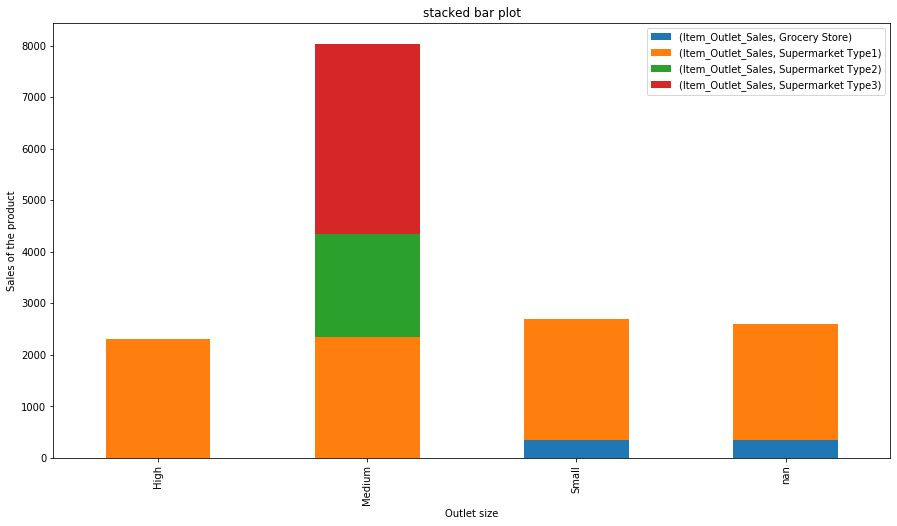

In [66]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot the stacked bar plot
# title: display the title 
# let the stacked barplot definition be assigned to variable 'ax' 
ax = stack.plot.bar(title='stacked bar plot', stacked=True, label='Outlet Type')

# set the legend
ax.legend()

# set the label for y-axis
ax.set_ylabel('Sales of the product')

# set the label for x-axis
ax.set_xlabel('Outlet size')

# display the plot
plt.show()

**Interpretation:** Large and small sized stores have the low sales. The outlets with the medium size include all types of supermarkets but not grocery stores.

<a id="crosstab"> </a>
## 6.4 Crosstab

**Let's take a look at how many different supermarkets are located at different locations.**

In [67]:
# use a cross tab to get a count
# index: values to group by in the rows
# columns: values to group by in the columns
pd.crosstab(index=df_sales['Outlet_Location_Type'], columns= df_sales['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
-,15,52,0,0
--,27,82,0,0
?,36,84,0,0
NAN,1,15,0,0
Tier 2,0,930,928,935
Tier 3,0,932,0,0
Tier1,528,1860,0,0
na,5,43,0,0


**Interpretation:** Tier 3 has the supermarkets of type 1 only, and Tier 2 has all types of supermarkets. Observe that there are missing values in the variable outlet location type. We will deal with missing value treatments in the next session. 